# Exploratory Data Analysis of COVID-19 Related Scams

The objective of this Python notebook is to examine scam reports relating to COVID-19 related scams in our text corpus.

## Import necessary libraries

In [22]:
import pandas as pd
import spacy
from spacy.matcher import Matcher
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

In [23]:
def read_csv(path):
    
    """This function reads a CSV file from a specified filepath, while preserving the data types of each variable.
    Source: https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv/50051542#50051542"""
    
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path, nrows=1).iloc[0].to_dict().items() if 'date' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'date' in value]
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

In [24]:
# Load dataset
text_scam_df = read_csv("Data/scam_data_4.csv")

# First five rows
text_scam_df.head()

# Only look at data after 1st Aug 2019
text_scam_df = text_scam_df[text_scam_df['monthyear'] >= '2020-01-01']

# Select required columns
df = text_scam_df.loc[:, ['submission_id', 'date', 'monthyear', 'scam_type', 'incident_description', 'preprocessed_text']]
df

,submission_id,date,monthyear,scam_type,incident_description,preprocessed_text
0,20200717-fBLC6F,2020-07-17,2020-07-01,Impersonation Scam,\r\n They call me by whatsapp ...,they call me by whatsapp it was strange for th...
1,20200717-yOxIAl,2020-07-17,2020-07-01,Phishing Scam,\r\n it happened this morning 0...,it happened this morning hrs i received a phon...
2,20200717-Tz5TyW,2020-07-17,2020-07-01,Phishing Scam,\r\n I rceived a call from a la...,i rceived a call from a lady claiming to be ca...
3,20200716-O79B6r,2020-07-16,2020-07-01,Impersonation Scam,\r\n details: I received a call...,details i received a call from what seemed lik...
4,20200716-yIa3LH,2020-07-16,2020-07-01,Phishing Scam,\n1) An impersonated junior technical staff ca...,an impersonated junior technical staff called ...
...,...,...,...,...,...,...
697,20200102-077b2l,2020-01-02,2020-01-01,Online Purchase Scam,\r\n Tried to buy a new laptop ...,tried to buy a new laptop from seller on lazad...
698,20200102-BPbuNG,2020-01-02,2020-01-01,Lottery Scam,\r\n I received a viber call de...,"i received a viber call dec, telling that i wo..."
699,20200102-N6GkI5,2020-01-02,2020-01-01,Impersonation Scam,\nI received an automated phone call claimed t...,i received an automated phone call claimed to ...
700,20200102-xWAPzV,2020-01-02,2020-01-01,Impersonation Scam,\r\n Received and automated voi...,received and automated voice caller. saying my...


## Extract scam reports containing COVID-19 related words and phrases

In [25]:
nlp = spacy.load("en_core_web_sm")

In [26]:
matcher = Matcher(nlp.vocab)

# Define patterns matching Covid-related terms
pattern1_1 = [{"LOWER": "moh"}]
pattern1_2 = [{"LOWER": "ica"}]
pattern1_3 = [{"LOWER": "payout"}]
pattern1_4 = [{"LOWER": "ministry"}, {"LOWER": "of"}, {"LOWER": "health"}]
pattern1_5 = [{"LOWER": "immigration"}, {"LOWER": "and"}, {"LOWER": "checkpoints"}, {"LOWER": "authority"}]
pattern1_6 = [{"LOWER": "ministry"}, {"LOWER": "of"}, {"LOWER": "manpower"}]

pattern2_1 = [{"LOWER": "covid-19"}]
pattern2_2 = [{"LOWER": "covid"}]
pattern2_3 = [{"LOWER": "corona"}, {"IS_PUNCT": True, "OP": "?"}, {"LOWER": "virus"}]
pattern2_4 = [{"LOWER": "pandemic"}]

pattern3_1 = [{"LOWER": "circuit"}, {"LOWER": "breaker"}]
pattern3_2 = [{"LOWER": "cb"}]
pattern3_3 = [{"LOWER": "lockdown"}]
pattern3_4 = [{"LOWER": "stay"}, {"IS_PUNCT": True, "OP": "?"}, {"LOWER": "home"}, {"LOWER": "notice"}]
pattern3_5 = [{"LOWER": "home"}, {"IS_PUNCT": True, "OP": "?"}, {"LOWER": "quarantine"}, {"LOWER": "order"}]
pattern3_6 = [{"LOWER": "shn"}]
pattern3_7 = [{"LOWER": "hqo"}]
pattern3_8 = [{"LOWER": "contact"}, {"LOWER": "tracing"}]

pattern4_1 = [{"LOWER": "face"}, {"LEMMA": "mask"}]
pattern4_2 = [{"LOWER": "surgical"}, {"LEMMA": "mask"}]
pattern4_3 = [{"LEMMA": "mask"}]
pattern4_4 = [{"LOWER": "face"}, {"IS_PUNCT": True, "OP": "?"}, {"LEMMA": "mask"}]
pattern4_5 = [{"LOWER": "hand"}, {"LOWER": "sanitizer"}]
pattern4_6 = [{"LOWER": "hand"}, {"LOWER": "sanitizers"}]

matcher.add("GOVT", None, pattern1_1, pattern1_2, pattern1_3, pattern1_4, pattern1_5, pattern1_6)
matcher.add("COVID", None, pattern2_1, pattern2_2, pattern2_3, pattern2_4)
matcher.add("SGP", None, pattern3_1, pattern3_2, pattern3_3, pattern3_4, pattern3_5, pattern3_6, pattern3_7, pattern3_8)
matcher.add("ITEMS", None, pattern4_1, pattern4_2, pattern4_3, pattern4_4, pattern4_5, pattern4_6)

In [27]:
all_matches = []
for i in range(df.shape[0]):
    doc = nlp(df.preprocessed_text[i])
    matches = matcher(doc)
    
    match_list = []
    for match_id, start, end in matches:
        span = doc[start:end]
        match_list.append(span.text)
    all_matches.append(match_list)

In [28]:
# Create new columns to store extracted terms
df = df.assign(extracted_terms='')
df['extracted_terms'] = pd.Series(all_matches)

# Sanity check
df.head(50)

,submission_id,date,monthyear,scam_type,incident_description,preprocessed_text,extracted_terms
0,20200717-fBLC6F,2020-07-17,2020-07-01,Impersonation Scam,\r\n They call me by whatsapp ...,they call me by whatsapp it was strange for th...,[]
1,20200717-yOxIAl,2020-07-17,2020-07-01,Phishing Scam,\r\n it happened this morning 0...,it happened this morning hrs i received a phon...,[]
2,20200717-Tz5TyW,2020-07-17,2020-07-01,Phishing Scam,\r\n I rceived a call from a la...,i rceived a call from a lady claiming to be ca...,[]
3,20200716-O79B6r,2020-07-16,2020-07-01,Impersonation Scam,\r\n details: I received a call...,details i received a call from what seemed lik...,[]
4,20200716-yIa3LH,2020-07-16,2020-07-01,Phishing Scam,\n1) An impersonated junior technical staff ca...,an impersonated junior technical staff called ...,[]
5,20200715-O0xzp3,2020-07-15,2020-07-01,Home/Room Rental Scam,\r\n Hi I received a whats app ...,hi i received a whats app from someone called ...,[]
6,20200715-uqohM3,2020-07-15,2020-07-01,Internet Love Scam,\r\n This man is from China and...,this man is from china and claimed live in hon...,[]
7,20200715-t94sPY,2020-07-15,2020-07-01,Internet Love Scam,\r\n Met online at inner circle...,met online at inner circle dating app. said hi...,[]
8,20200715-kX0SDp,2020-07-15,2020-07-01,Phishing Scam,\nI received a call from “John” from Singtel i...,i received a call from john from singtel inter...,[]
9,20200715-mMoScW,2020-07-15,2020-07-01,Phishing Scam,\nReceived a call from +6580609718 but hung up...,received a call from but hung up as call was u...,[]


In [29]:
# Create a binary column 
df = df.assign(covid_related='')

for i in range(df.shape[0]):    
    if len(df.loc[i, 'extracted_terms']) == 0:
        df.loc[i, 'covid_related'] = "no"
    else:
        df.loc[i, 'covid_related'] = "yes"

In [30]:
covid_df = df[df['covid_related'] == 'yes']
covid_df = covid_df.reset_index().drop(columns=['index'])
covid_df.shape
print("There are a total of {} scam reports contained terms related to Covid-19.".format(covid_df.shape[0]))

There are a total of 110 scam reports contained terms related to Covid-19.


Not all 110 stories are directly due to Covid-19 as they merely mentioned some of these terms. We shall next manually inspect these stories to determine if they are scams as a direct result of Covid-19.

In [31]:
# Manually inspect each of the 110 scam stories
for idx, row in covid_df.iterrows():
    print("SUBMISSION ID: ", row['submission_id'])
    print("DATE: ", row['date'])
    print("TEXT:\n", row['preprocessed_text'], "\n")

SUBMISSION ID:  20200715-JnHFae
DATE:  2020-07-15 00:00:00
TEXT:
 on jul at. am, received a phone call from with voice both in english and mandarin. claiming they calling from ministry of health and i have a parcel not collected... immediately i hang up the call 

SUBMISSION ID:  20200713-81cowz
DATE:  2020-07-13 00:00:00
TEXT:
 receiveda call from the number. i picked up but did not speak. heard an automated voice message in english and then in chinese saying it is a call from the ministry of health. hung up without engaging further. 

SUBMISSION ID:  20200710-J6pWYD
DATE:  2020-07-10 00:00:00
TEXT:
 it was an automated call claiming to be from ministry of health, at first i thought it was covid related so i did not hang up immediately. but after hearing words like aretrieving document ', haverify phone number ', i immediately hung up and called the ministry of health hotline to verify that the phone call that i just received was a spam call. indeed when they helped me to verify that 

Out of the 110 scam stories, we identify the index of those which were directly due to Covid-19.

In [32]:
# Submission IDs of scam stories related to Covid-19
index_covid_scams = ['20200715-JnHFae',
                     '20200713-81cowz', 
                     '20200710-J6pWYD',
                     '20200708-dtiPky',
                     '20200708-Z4hgf6',
                     '20200707-VgNEST',
                     '20200428-U3e7nl',
                     '20200417-hs6P5B',
                     '20200417-H2nvfl',
                     '20200417-9e5bmo',
                     '20200417-Uj7iSu',
                     '20200416-k5HNMI',
                     '20200416-KcAtg2',
                     '20200415-STkZSF',
                     '20200414-dbT4ot',
                     '20200414-KEkfxS',
                     '20200414-CzjjGa',
                     '20200413-stZMHw',
                     '20200410-yjYi9O',
                     '20200409-L5T3y1',
                     '20200407-imUrB8',
                     '20200403-SugBG6',
                     '20200403-Z1z2E1',
                     '20200402-Gn30bM',
                     '20200330-jJAVtd',
                     '20200329-Imdzi4',
                     '20200327-ndCH30',
                     '20200327-OH361O',
                     '20200327-zA4km7',
                     '20200327-Q8hL6V',
                     '20200327-PpjBaF',
                     '20200327-Wxb2ae',
                     '20200327-hUwBk8',
                     '20200327-VkI85T',
                     '20200327-1IpDG6',
                     '20200327-ZY8L5f',
                     '20200327-LfeCHW',
                     '20200327-RA8QR8',
                     '20200327-6FgzeX',
                     '20200326-w1plvQ',
                     '20200326-AeZEUu',
                     '20200326-zo8QC5',
                     '20200326-TO0swW',
                     '20200326-oy9qd3',
                     '20200326-bLIoZZ',
                     '20200326-hOjgE7',
                     '20200325-Rr6zQF',
                     '20200325-QmGkXw',
                     '20200325-UuUUeZ',
                     '20200325-o25GkK',
                     '20200325-8xJ9ES',
                     '20200324-BwSqdR',
                     '20200324-P1Ee94',
                     '20200324-NnD2rG',
                     '20200324-WLsFgH',
                     '20200323-3NYhC5',
                     '20200323-v9KXNI',
                     '20200322-oX2Iw3',
                     '20200322-n0NkYO',
                     '20200320-Fl2tqq',
                     '20200320-ezbY73',
                     '20200320-Ib45Ti',
                     '20200319-krUFIK',
                     '20200318-btSyTd',
                     '20200317-esKrtK',
                     '20200316-y9D3om',
                     '20200222-vzrVmY',
                     '20200219-r9Ex72',
                     '20200216-wnO4U9',
                     '20200213-dHD3nO']

In [33]:
direct_covid_df = covid_df[covid_df.submission_id.isin(index_covid_scams)].reset_index().drop(columns=['index'])
direct_covid_df

,submission_id,date,monthyear,scam_type,incident_description,preprocessed_text,extracted_terms,covid_related
0,20200715-JnHFae,2020-07-15,2020-07-01,Impersonation Scam,"\r\n on 15 Jul 2020 at 9.51am, ...","on jul at. am, received a phone call from with...",[ministry of health],yes
1,20200713-81cowz,2020-07-13,2020-07-01,Phishing Scam,\r\n Received a call from the n...,receiveda call from the number. i picked up bu...,[ministry of health],yes
2,20200710-J6pWYD,2020-07-10,2020-07-01,Phishing Scam,\r\n It was an automated call c...,it was an automated call claiming to be from m...,"[ministry of health, covid, ministry of health...",yes
3,20200708-dtiPky,2020-07-08,2020-07-01,Impersonation Scam,\r\n Someone is impersonating M...,someone is impersonating ministry of manpower ...,"[ministry of manpower, covid, contact tracing,...",yes
4,20200708-Z4hgf6,2020-07-08,2020-07-01,Phishing Scam,\nOn 08 july 2020 around 0845hrs received a ca...,on july around hrs received a call. robocall c...,"[ministry of health, ministry of health, minis...",yes
...,...,...,...,...,...,...,...,...
65,20200316-y9D3om,2020-03-16,2020-03-01,Impersonation Scam,\r\n Got a phonecall from 80184...,got a phonecall from at hrs today. claiming hi...,[masks],yes
66,20200222-vzrVmY,2020-02-22,2020-02-01,Online Purchase Scam,\r\n Bought hand sanitizers on ...,bought hand sanitizers on ninelif. singapore b...,[hand sanitizers],yes
67,20200219-r9Ex72,2020-02-19,2020-02-01,Online Purchase Scam,\r\n I purchased kids surgical ...,i purchased kids surgical mask on ninelif. sin...,"[surgical mask, mask, masks, hand sanitizers]",yes
68,20200216-wnO4U9,2020-02-16,2020-02-01,Online Purchase Scam,\r\n 09 feb 2020 Saw the advert...,feb saw the advertisement on facebook selling ...,"[surgical masks, masks, masks]",yes


In [34]:
direct_covid_df.shape

(70, 8)

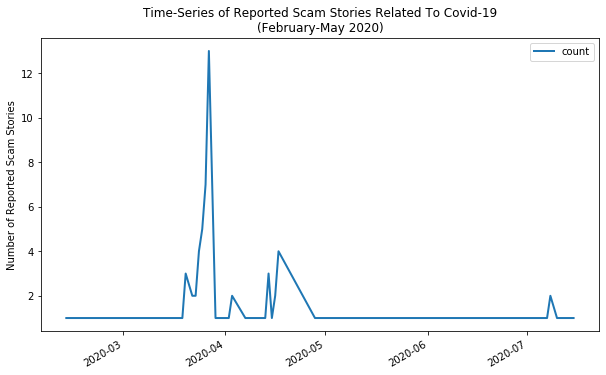

In [35]:
direct_covid_df1 = direct_covid_df.groupby(by='date')['scam_type'].count().to_frame('count').reset_index()
direct_covid_df1.set_index('date', inplace=True)
direct_covid_df1.plot(figsize=(10,6), linewidth=2)
plt.xlabel("")
plt.ylabel("Number of Reported Scam Stories")
plt.title("Time-Series of Reported Scam Stories Related To Covid-19\n(February-May 2020)")
plt.show()

### Breakdown by Scam Type

In [36]:
direct_covid_df.scam_type = direct_covid_df.scam_type.astype('str')

In [37]:
a = direct_covid_df.groupby('scam_type')['covid_related'].count().to_frame('count').reset_index()
a['scam_type_cat'] = [i for i in range(len(a['scam_type']))]
a

,scam_type,count,scam_type_cat
0,Impersonation Scam,62,0
1,Online Purchase Scam,4,1
2,Phishing Scam,4,2


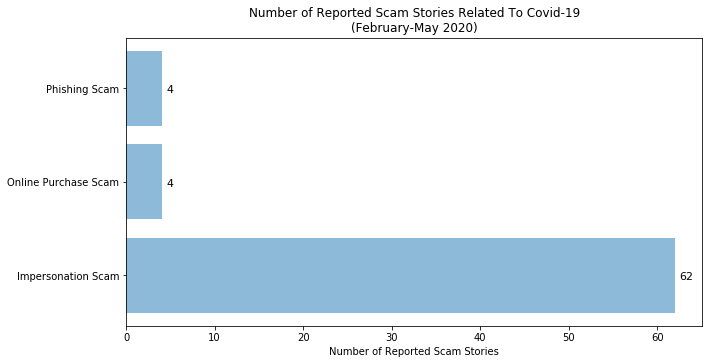

In [38]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0,0,1,1])
ax.barh(a['scam_type'], a['count'], alpha=0.5)
for i in range(len(a['scam_type'])):
    plt.text(x = a['count'][i]+0.5, y = a['scam_type_cat'][i]-0.05, 
             s = a['count'][i], size = 11)
plt.title("Number of Reported Scam Stories Related To Covid-19\n(February-May 2020)")
plt.xlabel("Number of Reported Scam Stories")
plt.show()

From official data:
- Between January and April 2020, a total of 5,425 cases of scams were reported to the SPF. Of this number, 394 were connected to Covid-19. 
- They are broadly categorised into three types:
1. E-commerce scams, such as those related to the sale of face masks and hand sanitisers
2. Impersonation scams where perpetrators pretended to be officials from the Ministry of Health so that they could retrieve the victims’ personal data and information
3. Phishing scams which typically involved fraudulent emails and phone text messages containing fake offers or false information on payouts disbursed by the Government. This is done with the aim of tricking the victims into sharing their credit or debit card details or their one-time passwords (OTP) for access to accounts.

Source: "Close to 400 Covid-19-related scams reported, SGD1.4 million cheated from January to April" from https://www.todayonline.com/singapore/close-400-covid-19-related-scams-reported-s14-million-cheated-january-april?cid=tdy%20tg_tg-am_social-msging-free_09102018_today

Other Related News:
- "Covid-19: 4 men, 1 woman arrested for separate e-commerce scams involving face mask" from https://www.todayonline.com/singapore/covid-19-4-men-1-woman-arrested-separate-e-commerce-scams-involving-face-masks?cid=h3_referral_inarticlelinks_03092019_todayonline
- "Clinic employee jailed, fined for cheating 23 people who wanted to buy face masks on Carousell" from https://www.todayonline.com/singapore/clinic-employee-jailed-fined-cheating-23-people-who-wanted-buy-face-masks-carousell?cid=h3_referral_inarticlelinks_03092019_todayonline
- "19-year-old pleads guilty to duping online shoppers, pretending she was selling surgical masks" from https://www.todayonline.com/singapore/19-year-old-pleads-guilty-duping-online-shoppers-pretending-she-was-selling-surgical-masks?cid=h3_referral_inarticlelinks_03092019_todayonline
- Man arrested, suspected of cheating victim of SGD175,000 for face masks from https://www.todayonline.com/singapore/man-arrested-suspected-cheating-victim-s175000-face-masks?cid=h3_referral_inarticlelinks_03092019_todayonline